In [215]:
# Common Imports
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num

# Data Import Module
%run ./Module_DataImport.ipynb

# Data Visualization Module
%run ./Module_DataVisualization.ipynb

# Data Derivatives Module
%run ./Module_DataDerivatives.ipynb

## Deployment Information
In the code cell are variables that can be tuned based on the deployment, they are described in more detail below:
- student_list: a integer list of the students included in this study. Valid student numbers are between 2 and 9, inclusive.
- start_date: the first date that you would like to include in the summary. The earliest date that can be chosen that will ensure at least one student has data is 03/11/2019.
- end_date: the last date to include in the summary. No more data are available after 04/15/2019.

The start and end dates are defaulted to the earliest and latest dates, respectively, given in the description above. 

In [197]:
student_list = np.arange(2,10,1)
start_date = '04/01/2019'
end_date = '04/04/2019'
# Getting the number of hours
time_diff = datetime.strptime(end_date, '%m/%d/%Y') - datetime.strptime(start_date, '%m/%d/%Y')
num_hours = int(divmod(time_diff.total_seconds(),3600)[0])+24 # add 24 because we import all of the last day

## Data Import

### Indoor Environmental Quality Data
In the code cell below, the indoor environmental quality data is imported from the ```beacon_data``` directory available for Students 2 through 9. The variables include:
1. Temperature
2. Relative Humidity$^1$
3. PM2.5

The functions for importing the data are stored in the ```Module_DataImport.pynb``` notebook in the same directory as this master notebook. 

$^1$Temperature and Relative Humidity are imported together and stored in the same dataframe. Collectively, they are referred to as "thermal comfort"

In [198]:
TC_byStudent = pd.Series()
Concentration_byStudent = pd.Series()
for n in student_list:
    print()
    print('Importing IEQ Data for: Student',n)
    print('\nImporting Thermal Comfort Data...')
    TC_temp = ieqImport(str(n),'sht31d',['time','rh','temp'],'all',start_date,end_date)
    if len(TC_temp) < 5*num_hours: # We should get at least 5 data points per hour
        print('\tInsufficient Data - not importing')
    else:
        TC_byStudent['Student' + str(n)] = TC_temp
        print('\tImport Complete')
        
    print('\nImporting PM2.5 Concentration Data...')
    Concentration_temp = ieqImport(str(n),'pms5003',['time','PM2.5'],[0,2],start_date,end_date)
    if len(Concentration_temp) < 5*num_hours: # We should get at least 5 data points per hour
        print('\tInsufficient Data - not importing')
    else:
        Concentration_byStudent['Student' + str(n)] = Concentration_temp
        print('\tImport Complete')


Importing IEQ Data for: Student 2

Importing Thermal Comfort Data...
	No data from this deployment range
	Insufficient Data - not importing

Importing PM2.5 Concentration Data...
	No data from this deployment range
	Insufficient Data - not importing

Importing IEQ Data for: Student 3

Importing Thermal Comfort Data...
	Number of datapoints: 479
	Insufficient Data - not importing

Importing PM2.5 Concentration Data...
	Number of datapoints: 71
	Insufficient Data - not importing

Importing IEQ Data for: Student 4

Importing Thermal Comfort Data...
	Number of datapoints: 860
	Import Complete

Importing PM2.5 Concentration Data...
	Number of datapoints: 84
	Insufficient Data - not importing

Importing IEQ Data for: Student 5

Importing Thermal Comfort Data...
	Number of datapoints: 486
	Import Complete

Importing PM2.5 Concentration Data...
	No data from this deployment range
	Insufficient Data - not importing

Importing IEQ Data for: Student 6

Importing Thermal Comfort Data...
	Number o

### Sleep Quality Data
There are two types of sleep quality data, gathered from different sources:
1. Sleep Stages from Fitbit
2. Perceived Sleep Quality from Beiwe EMA Surveys

Both datasets are imported below in the code cell.

In [199]:
SS_byInd = pd.Series()
PSQ_byInd = pd.Series()
for n in student_list:
    print('Importing Sleep Quality Data for: Student',n)
    SS_byInd['Student' + str(n)] = fitbitImport(str(n),'S' + str(n) + '_SleepStages.csv',['Time','ShortWakes','Stage_Label'],[1,3,4],start_date,end_date)

Importing Sleep Quality Data for: Student 2
16428
	Number of datapoints: 631
Importing Sleep Quality Data for: Student 3
7736
	Number of datapoints: 730
Importing Sleep Quality Data for: Student 4
16999
	Number of datapoints: 3097
Importing Sleep Quality Data for: Student 5
	No data from this deployment range
Importing Sleep Quality Data for: Student 6
	No data from this deployment range
Importing Sleep Quality Data for: Student 7
	No data from this deployment range
Importing Sleep Quality Data for: Student 8
17777
	Number of datapoints: 3108
Importing Sleep Quality Data for: Student 9
	No data from this deployment range


## Single Variable Data Visualization
Below are visualizations that incorporate one variable.

### PM2.5
There are three main PM2.5 Concentration figures:
1. Time Series showing daily PM2.5 concentrations in their home
2. Time Series showing daily AQI for PM2.5 in their home
3. Bar Chart showing daily median concentrations in their home

#### PM2.5 Concentration Profile

In [200]:
# Data Visualization Module
%run ./Module_DataVisualization.ipynb

# Looping through all the imported data
for name in Concentration_byStudent.index:
    ## Created new columns in the dataframe that store the month and date
    Concentration_byStudent[name]['Month'] = Concentration_byStudent[name].index.month        
    Concentration_byStudent[name]['Day'] = Concentration_byStudent[name].index.day
    ## Splitting the dataframe by the month and day to get a dataframe per day
    agg = Concentration_byStudent[name].groupby(['Month','Day'])
    Median_byInd = agg.median()
    
    ## Looping through the individual's days of data and plotting
    index = 0
    for group in agg:
        ### Converting the group into a dataframe
        group = pd.DataFrame(data=group[1])
        ### Plotting Concentration profile
        #getFinePMTimeSeries(group.index,group['PM2.5'],'Concentration ($\mu$g/m$^3$)',index+1)
        ### Plotting AQI profile
        #getFinePMTimeSeries(group.index,getAQI(group['PM2.5']),'Air Quality Index',index+1)
        index += 1

### Sleep Stages/Quality

Student2
Student3
Student4
Student8


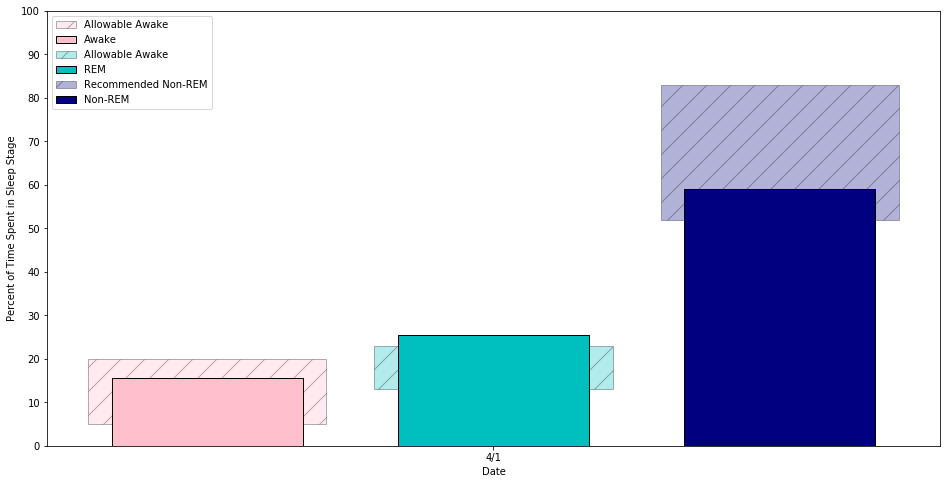

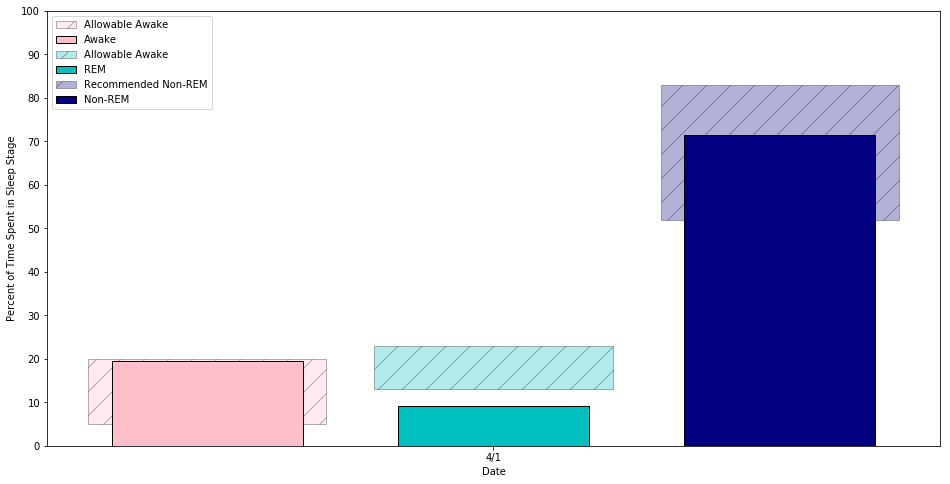

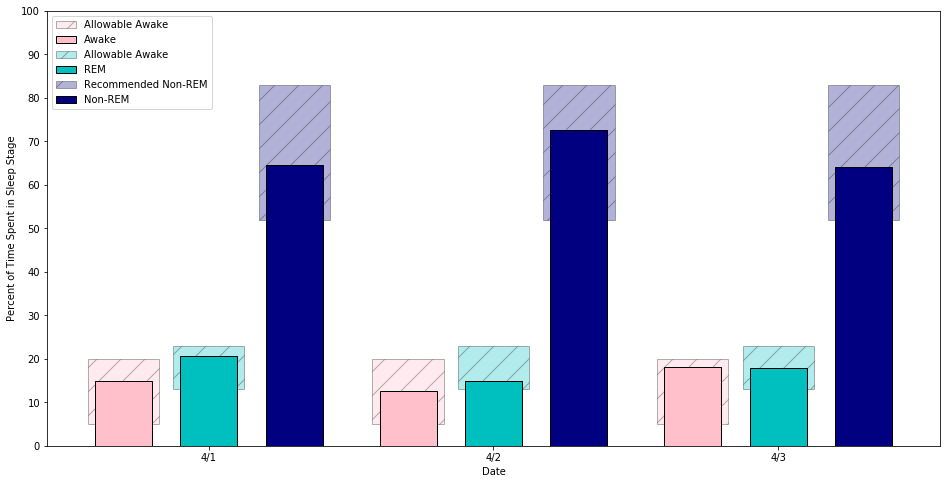

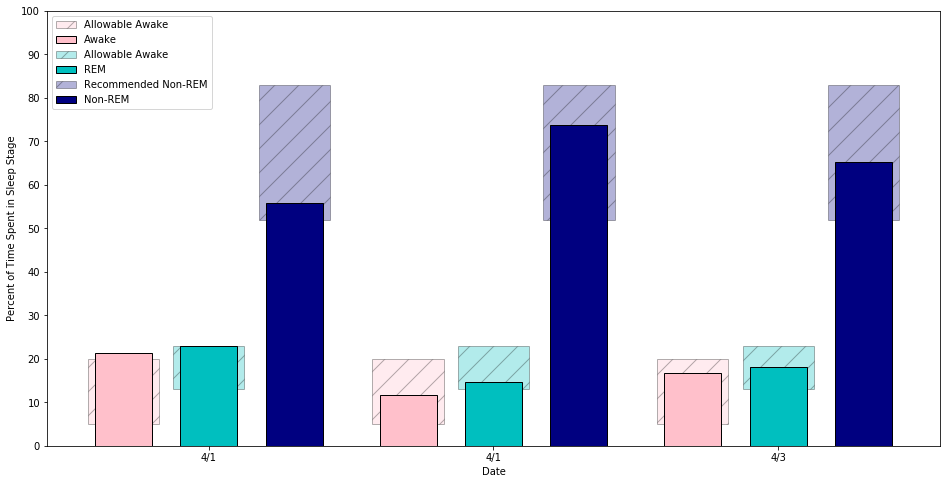

In [247]:
# Data Derivatives Module
%run ./Module_DataDerivatives.ipynb

# Data Visualization Module
%run ./Module_DataVisualization.ipynb

#print(SS_byInd[0])
SE_byInd = pd.Series()
for name in SS_byInd.index:
    if len(SS_byInd[name]) > 0:
        print(name)
        SE_byInd[name] = getSleepEfficiency(SS_byInd[name])
        #getSleepStagePercentages(SE_byInd[name])
        getSleepStageBenchmark1(SE_byInd[name])
        #print(SE_byInd[name].head())

## 